In [8]:
import pandas as pd

import datetime

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np


%matplotlib inline 
#делаем интерактивные данные прямо в юпитере ноутбук

In [9]:
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-vedernikova/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')
ads_clients_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-vedernikova/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [10]:
ads_data.head(3) #CPC - рекламодатель платит за клик, CPM - рекламодат платит за просмотр 

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410


In [11]:
ads_data.shape #(1000000, 11)

(1000000, 11)

In [12]:
# Преобразовываем колонки во время
ads_data['time'] = pd.to_datetime(ads_data.time)
ads_data['date'] = pd.to_datetime(ads_data.date)

### Описание данных
#### ads_data.csv – данные взаимодействий с рекламными объявлениями
 - date – дата
 - time – время
 - event – действие (просмотр/клик)
 - platform – платформа
 - ad_id – id объявления
 - client_union_id – id рекламного кабинета
 - campaign_union_id – id рекламной кампании
 - ad_cost_type – тип оплаты
 - ad_cost – цена
 - has_video – есть ли видео
 - target_audience_count – размер аудитории

#### ads_clients_data.csv – характеристики рекламных клиентов
 - date – дата
 - client_union_id – id рекламного кабинета
 - community_id – id сообщества
 - create_date – дата создания рекламного клиента

### Разберемся с распределением количества показов и кликов.
#### Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

Построили график, где видим, что 5го числа был ПИК показов:

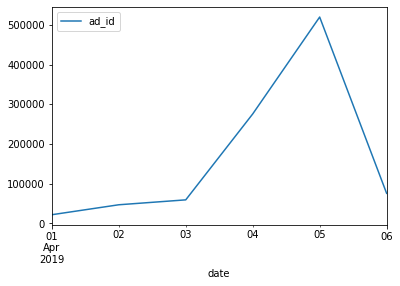

In [13]:
ads_data.groupby(['date']) \
        .agg({'ad_id':'count'}).plot()

In [14]:
ads_data.groupby(['date', 'event'], as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date', columns='event', values='ad_id') \
        .reset_index()

event,date,click,view
0,2019-04-01,291,21782
1,2019-04-02,545,46572
2,2019-04-03,460,59023
3,2019-04-04,643,275092
4,2019-04-05,92321,427386
5,2019-04-06,14918,60967


### Необходимо посчитать среднее количество разных рекламных событий (показы и клики) по объявлениям.

In [15]:
ads_data_count = ads_data.groupby(['ad_id','event'], as_index=False) \
        .agg(counts=('ad_id', 'count')) \
        .pivot(index='ad_id', columns='event', values='counts') \
        .fillna(0) \
        .reset_index()
ads_data_count.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [16]:
ads_data_count.mean()

event
ad_id    57971.024870
click      113.137824
view       923.131606
dtype: float64

Среднее количество кликов на объявление 113. Среднее количество показов на объявление 923.

In [17]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [18]:
# Проверка на наличие нулей или отрицательных значений
if (ads_data_count['view'] <= 0).any():
    print("В данных есть нули или отрицательные значения")
else:
    # Применение np.log() к столбцу column1
    data_log = np.log(ads_data_count['view'])
    print(data_log)

В данных есть нули или отрицательные значения


### Необходимо посмотреть график распределения просмотров

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

In [21]:
data_log = np.log(ads_data_count['view'][ads_data_count['view'] > 0])
data_log = pd.DataFrame(data_log)
data_log.head(3)

,view
0,4.615121
1,5.214936
2,3.713572


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


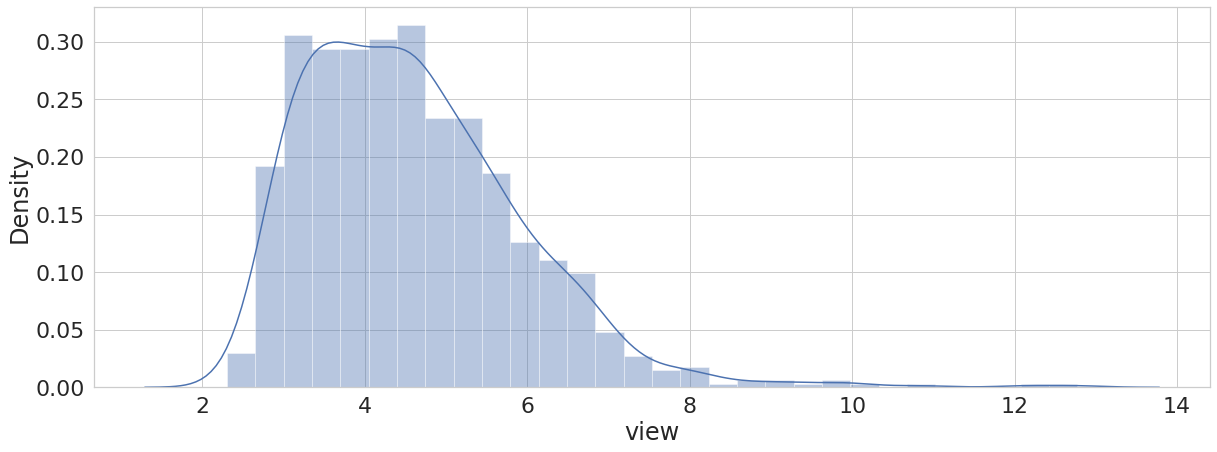

In [221]:
ax = sns.distplot(data_log.view)

In [22]:
ads_data.head(3)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410


### Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее).
#### После этого необходимо посчитать скользящее среднее по полученному результату с окном в 2 элемента.

In [50]:
daily_ad_views = ads_data.query('event == "view"').pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')
daily_ad_views.head(3)

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN


In [51]:
mean_views = daily_ad_views.mean()
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [52]:
rolling_daily = daily_ad_views.mean().rolling(window=2).mean().round(0)
rolling_daily

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

### Скользящее среднее часто используется для поиска аномалий в данных. Попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

#### Посчитаем, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?

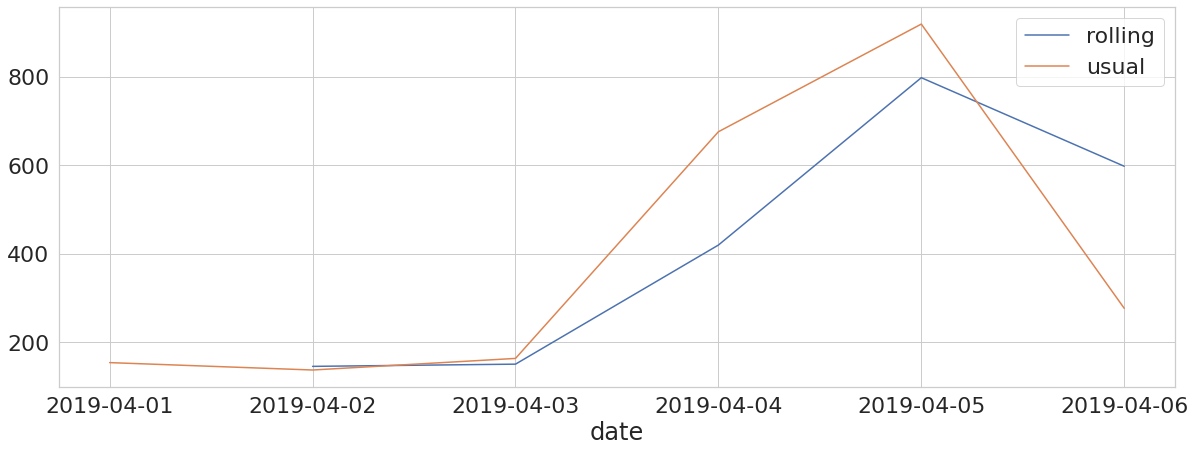

In [57]:
fig, ax = plt.subplots()
sns.lineplot(data=rolling_daily, ax=ax, label='rolling')
sns.lineplot(data=mean_views, ax=ax, label='usual')

В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
2019-04-06.

### Необходимо объединить данные рекламы с данными о рекламных клиентах и найти среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

In [58]:
merge = ads_clients_data.merge(ads_data, on=['client_union_id'], suffixes=('_client_data', '_ad_data'))

In [62]:
merge.head(2)

,date_client_data,client_union_id,community_id,create_date,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035


In [64]:
# Преобразуем столбец 'create_date' из строкового формата в формат Timestamp
merge['create_date'] = pd.to_datetime(merge['create_date'])

# Вычисляем разницу между датами
merge['difference'] = merge['date_ad_data'] - merge['create_date']

In [65]:
merge.head(2)

,date_client_data,client_union_id,community_id,create_date,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,difference
0,2020-05-07,1,-130371893,2018-12-24,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days
1,2020-05-07,1,-130371893,2018-12-24,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days


In [67]:
first_ad = merge.groupby('client_union_id').difference.min()
first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [68]:
first_ad.mean()

Timedelta('124 days 09:04:43.532219570')

Среднее количество дней, которое проходит между созданием клиента и запуском рекламы, 124 дня.

### Необходимо вычислить конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [70]:
threshold = pd.Timedelta(365, unit='day')

In [72]:
lt_365 = first_ad[first_ad < threshold]

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов.

In [74]:
np.round(len(lt_365) / ads_clients_data.client_union_id.nunique() *100, 2)

0.69

0.69% клиентов в компании успешно создают свою рекламу меньше, чем за год

### Разделим клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

In [75]:
bins = [0, 30, 90, 180, 365]

In [76]:
bins = [pd.Timedelta(x, 'd') for x in bins]

In [77]:
bins

[Timedelta('0 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('180 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [78]:
labels = ['0-30', '30-90', '90-180', '180-365']

In [79]:
binned_first = pd.cut(first_ad, bins, labels=labels)

In [81]:
binned_first.head(3)

client_union_id
1     90-180
9     90-180
13     30-90
Name: difference, dtype: category
Categories (4, object): ['0-30' < '30-90' < '90-180' < '180-365']

In [82]:
binned_first.value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
Name: difference, dtype: int64

Всего 11 уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

Text(0.5, 1.0, 'Distribution of Time Intervals')

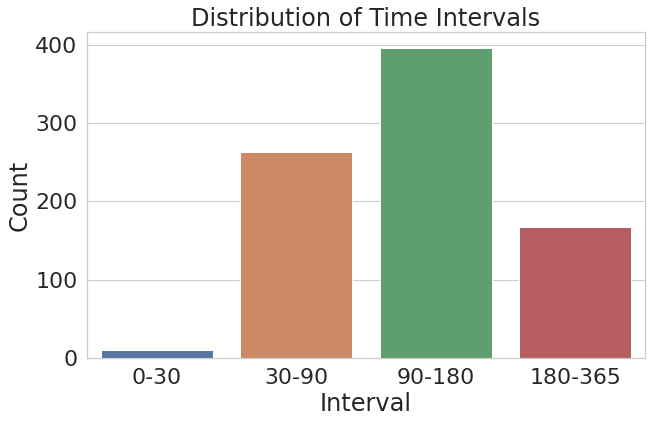

In [92]:
# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x=binned_first.value_counts().index, y=binned_first.value_counts().values)
plt.xlabel('Interval')
plt.ylabel('Count')
plt.title('Distribution of Time Intervals')
